## Import Data Set

In [ ]:
import pandas as pd

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Murphy/covid.csv')

# Print 5 roles of the columns
df.head()

,id,location,country,gender,age,sym_on,hosp_vis,vis_wuhan,from_wuhan,death,recov,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6
0,1,"Shenzhen, Guangdong",China,male,66.0,1/3/2020,1/11/2020,1,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Shanghai,China,female,56.0,1/15/2020,1/15/2020,0,1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Zhejiang,China,male,46.0,1/4/2020,1/17/2020,0,1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Tianjin,China,female,60.0,NaN,NaN,1,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Tianjin,China,male,58.0,NaN,NaN,0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# get the shape of the DataFrame
num_rows, num_cols = df.shape

# print the size of the DataFrame
print(f"The DataFrame has {num_rows} rows and {num_cols} columns.")

The DataFrame has 1085 rows and 17 columns.


## Data Profiling

In [ ]:
# display the summary statistics for numerical variables
print(df.describe())

                id         age    vis_wuhan   from_wuhan        death  \
count  1085.000000  843.000000  1085.000000  1081.000000  1085.000000   
mean    543.000000   49.483689     0.176959     0.144311     0.058065   
std     313.356825   18.255334     0.381810     0.351567     0.233973   
min       1.000000    0.250000     0.000000     0.000000     0.000000   
25%     272.000000   35.000000     0.000000     0.000000     0.000000   
50%     543.000000   51.000000     0.000000     0.000000     0.000000   
75%     814.000000   64.000000     0.000000     0.000000     0.000000   
max    1085.000000   96.000000     1.000000     1.000000     1.000000   

             recov  
count  1085.000000  
mean      0.146544  
std       0.353814  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000  


In [ ]:
# generate descriptive statistics for non-numerical data
non_num_desc = df.describe(include=['object'])

print(non_num_desc)

           location country gender     sym_on   hosp_vis symptom1 symptom2  \
count          1085    1085    902        449        449      270      161   
unique          156      38      2         60         58       27       31   
top     South Korea   China   male  1/23/2020  1/23/2020    fever    cough   
freq            112     197    520         22         27      178       66   

       symptom3 symptom4  symptom5  symptom6  
count        73       19         3         1  
unique       23       12         3         1  
top     malaise  dyspnea  vomiting  diarrhea  
freq         11        3         1         1  


In [ ]:
# Print data types of columns
print(df.dtypes)

id              int64
location       object
country        object
gender         object
age           float64
sym_on         object
hosp_vis       object
vis_wuhan       int64
from_wuhan    float64
death           int64
recov           int64
symptom1       object
symptom2       object
symptom3       object
symptom4       object
symptom5       object
symptom6       object
dtype: object


## **Data Cleaning**

## Check For Missing Data

In [ ]:
# check for missing values
missing_values = df.isnull().sum()

# print the results
print(missing_values)

id               0
location         0
country          0
gender         183
age            242
sym_on         636
hosp_vis       636
vis_wuhan        0
from_wuhan       4
death            0
recov            0
symptom1       815
symptom2       924
symptom3      1012
symptom4      1066
symptom5      1082
symptom6      1084
dtype: int64


Fill Missing Numerical Data With Mean

In [ ]:
# Fill missing numerical data with the mean
df['age'].fillna(df['age'].mean(), inplace=True)
df['from_wuhan'].fillna(df['from_wuhan'].mean(), inplace=True)

Fill Missing Non-Numerical Data with Mode

In [ ]:
# Fill missing non-numerical data with the mode
df['gender'].fillna(df['gender'].mode()[0], inplace=True)
df['sym_on'].fillna(df['sym_on'].mode()[0], inplace=True)
df['hosp_vis'].fillna(df['hosp_vis'].mode()[0], inplace=True)
df['symptom1'].fillna(df['symptom1'].mode()[0], inplace=True)
df['symptom2'].fillna(df['symptom2'].mode()[0], inplace=True)
df['symptom3'].fillna(df['symptom3'].mode()[0], inplace=True)
df['symptom4'].fillna(df['symptom4'].mode()[0], inplace=True)
df['symptom5'].fillna(df['symptom5'].mode()[0], inplace=True)
df['symptom6'].fillna(df['symptom6'].mode()[0], inplace=True)

Confirm if missing Values has been replaced

In [ ]:
# check for missing values
missing_values = df.isnull().sum()

# print the results
print(missing_values)

id            0
location      0
country       0
gender        0
age           0
sym_on        0
hosp_vis      0
vis_wuhan     0
from_wuhan    0
death         0
recov         0
symptom1      0
symptom2      0
symptom3      0
symptom4      0
symptom5      0
symptom6      0
dtype: int64


## Check For Irregular Data

In [ ]:
import numpy as np

# check for irregular data
irregular_data = df[~df.applymap(lambda x: isinstance(x, (int, float, np.number))).all(axis=1)]
if not irregular_data.empty:
    print("Irregular data detected:")
    print(irregular_data)
else:
    print("No irregular data detected.")

Irregular data detected:
        id             location      country  gender        age     sym_on  \
0        1  Shenzhen, Guangdong        China    male  66.000000   1/3/2020   
1        2             Shanghai        China  female  56.000000  1/15/2020   
2        3             Zhejiang        China    male  46.000000   1/4/2020   
3        4              Tianjin        China  female  60.000000  1/23/2020   
4        5              Tianjin        China    male  58.000000  1/23/2020   
...    ...                  ...          ...     ...        ...        ...   
1080  1081            Innsbruck      Austria    male  24.000000  1/23/2020   
1081  1082          Afghanistan  Afghanistan    male  35.000000  1/23/2020   
1082  1083              Algeria      Algeria    male  49.483689  1/23/2020   
1083  1084              Croatia      Croatia    male  49.483689  1/23/2020   
1084  1085                 Bern  Switzerland    male  70.000000  1/23/2020   

       hosp_vis  vis_wuhan  from_wuhan

Split location into City and province

In [ ]:
# create new columns 'city' and 'province' by splitting 'location' on comma
df[['city', 'province']] = df['location'].str.split(', ', n=1, expand=True)

# drop original 'location' column
df.drop('location', axis=1, inplace=True)

## Check For Unneccesary Data

In [ ]:
# check for repetitive and duplicate data
if df.duplicated().any():
    print("Duplicate data detected:")
    print(df[df.duplicated()])
else:
    print("No duplicate data detected.")

No duplicate data detected.


## Check for Inconsistent Data

In [ ]:
# check for inconsistent data types
for col in df.columns:
    if len(df[col].apply(type).value_counts()) > 1:
        print(f"Inconsistent data type found in column {col}")

# check for values outside of expected range
for col in df.columns:
    if df[col].dtype == "int64":
        if df[col].min() < 0 or df[col].max() > 100:
            print(f"Value outside of expected range found in column {col}")

Inconsistent data type found in column province
Value outside of expected range found in column id


To correct inconsistent data type found in province

In [ ]:
df['province'] = df['province'].astype(str)

Correct column id to be within range

In [ ]:
# print column id range
print(df['id'].min())  # prints the minimum value in the 'id' column
print(df['id'].max())  # prints the maximum value in the 'id' column

1
1085


In [ ]:
# Maximum number is more than 1084. reset column Id to start from 1 and increase by 1 till the end of the dataset
df = df.reset_index(drop=True)
df['id'] = df.index + 1

## **Exploratory Data Analysis**

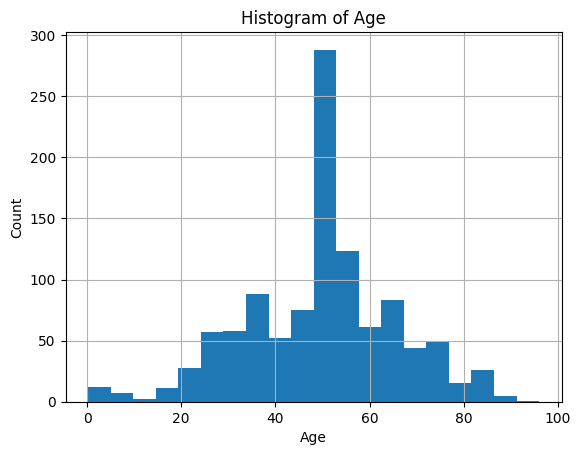

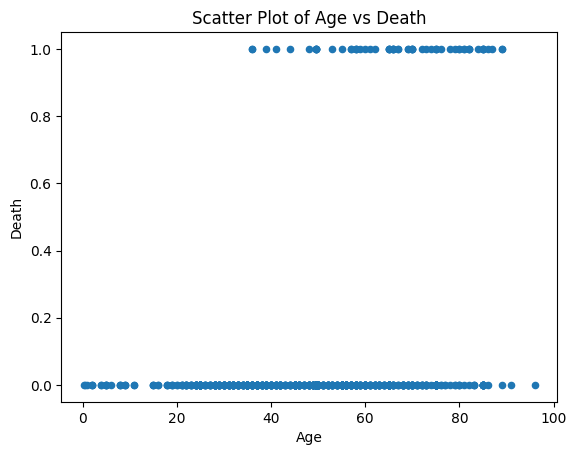

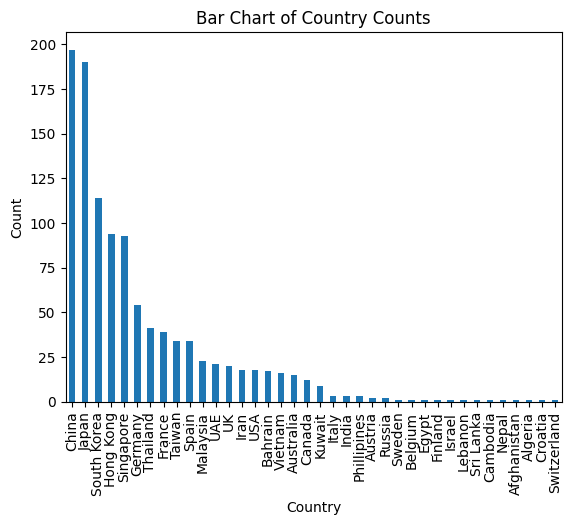

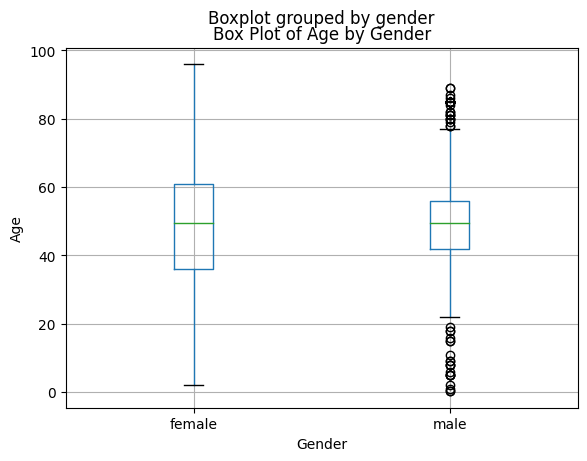

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Histogram of age
df['age'].hist(bins=20)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Scatter plot of age vs death
df.plot.scatter(x='age', y='death')
plt.title('Scatter Plot of Age vs Death')
plt.xlabel('Age')
plt.ylabel('Death')
plt.show()

# Bar chart of country counts
df['country'].value_counts().plot.bar()
plt.title('Bar Chart of Country Counts')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

# Box plot of age by gender
df.boxplot(column='age', by='gender')
plt.title('Box Plot of Age by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

# **Feature Engineering**

## Select Featured And Target Variable

In [ ]:
# Print Columns
print(df.columns)

Index(['id', 'country', 'gender', 'age', 'sym_on', 'hosp_vis', 'vis_wuhan',
       'from_wuhan', 'death', 'recov', 'symptom1', 'symptom2', 'symptom3',
       'symptom4', 'symptom5', 'symptom6', 'city', 'province'],
      dtype='object')


In [ ]:
# Select the target variables
target = ['death', 'recov']

# Select the feature variables
feature_variables = ['country', 'gender', 'age', 'sym_on', 'hosp_vis', 'vis_wuhan', 'from_wuhan', 'symptom1', 'symptom2', 'symptom3', 'symptom4', 'symptom5', 'symptom6']

## Encode Categorical Variables
Using Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Define categorical and numerical columns
cat_vars = ['gender', 'country', 'sym_on', 'hosp_vis', 'symptom1', 'symptom2', 'symptom3', 'symptom4', 'symptom5', 'symptom6']
num_vars = ['age', 'vis_wuhan', 'from_wuhan']

# Encode the target variable y
le = LabelEncoder()
y = le.fit_transform(df[target].values.ravel())

# Encode the categorical columns
encoded_cols = pd.get_dummies(df[cat_vars], columns=cat_vars)

# Concatenate the encoded columns with the numerical columns
X = pd.concat([encoded_cols, df[num_vars]], axis=1)

# Print the encoded data
print(encoded_cols)

      gender_female  gender_male  country_Afghanistan  country_Algeria  \
0                 0            1                    0                0   
1                 1            0                    0                0   
2                 0            1                    0                0   
3                 1            0                    0                0   
4                 0            1                    0                0   
...             ...          ...                  ...              ...   
1080              0            1                    0                0   
1081              0            1                    1                0   
1082              0            1                    0                1   
1083              0            1                    0                0   
1084              0            1                    0                0   

      country_Australia  country_Austria  country_Bahrain  country_Belgium  \
0                     0          

# **Implentation**

## Split Data to test and train

In [ ]:
from sklearn.model_selection import train_test_split

# Split into features and target variable
y = df[['death']]
X = df.drop(['death'], axis=1)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(encoded_cols, y, test_size=0.2, random_state=42)

## **Build Boosted Random Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=42)

## Fit Model To Train Set

In [ ]:
# Convert y_train to numpy array and flatten it
y_train = y_train.values.ravel()

# Train model
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

## Test Model With Test Data

In [ ]:
y_pred = gbrt.predict(X_test)

## Print Model Accuracy

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)


Accuracy:  0.9308755760368663


## Apply Hyperparameter Grid
this is to increase accuracy

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Define the pipeline
pipeline = Pipeline([
    ('clf', GradientBoostingClassifier(random_state=42))
])

# Define the hyperparameter grid to search
param_grid = {
    'clf__n_estimators': [50, 100, 200],
    'clf__max_depth': [3, 5, 7],
    'clf__min_samples_leaf': [1, 5, 10],
    'clf__learning_rate': [0.01, 0.1, 1]
}

# Create the GridSearchCV object
gsearch = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the training data
gsearch.fit(X_train, y_train)

# Print the best hyperparameters and best score
print("Best Hyperparameters: ", gsearch.best_params_)
print("Best Score: ", gsearch.best_score_)

Best Hyperparameters:  {'clf__learning_rate': 0.01, 'clf__max_depth': 7, 'clf__min_samples_leaf': 1, 'clf__n_estimators': 100}
Best Score:  0.9527672579895023


## Evaluation Parameters

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test set
y_pred = gsearch.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate the precision
precision = precision_score(y_test, y_pred)

# Calculate the recall
recall = recall_score(y_test, y_pred)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred)

# Print the metrics
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 score: ", f1)

Accuracy:  0.9400921658986175
Precision:  1.0
Recall:  0.13333333333333333
F1 score:  0.23529411764705882


In [ ]:
from sklearn.metrics import classification_report

# Create a list of target names for the classification report
target_names = ['recover', 'die']

# Print the classification report with target names
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     recover       0.94      1.00      0.97       202
         die       1.00      0.13      0.24        15

    accuracy                           0.94       217
   macro avg       0.97      0.57      0.60       217
weighted avg       0.94      0.94      0.92       217



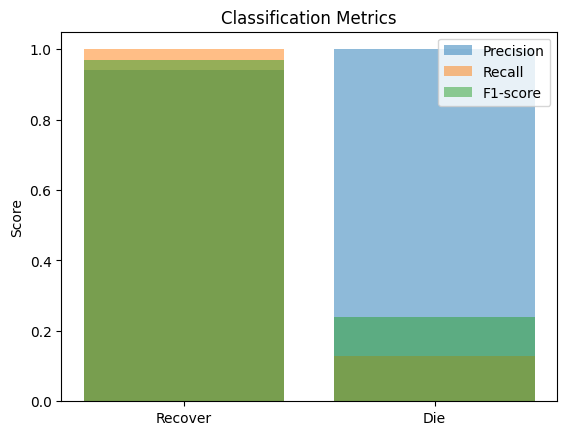

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the precision, recall, and F1-score for the two classes
precision = [0.94, 1.0]
recall = [1.0, 0.13]
f1_score = [0.97, 0.24]
labels = ['Recover', 'Die']

# Define the x-axis positions for the bars
x_pos = np.arange(len(labels))

# Create the bar plot
plt.bar(x_pos, precision, align='center', alpha=0.5, label='Precision')
plt.bar(x_pos, recall, align='center', alpha=0.5, label='Recall')
plt.bar(x_pos, f1_score, align='center', alpha=0.5, label='F1-score')

# Add axis labels and a title
plt.xticks(x_pos, labels)
plt.ylabel('Score')
plt.title('Classification Metrics')

# Add a legend and show the plot
plt.legend()
plt.show()
